In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('/content/index_calculate_2.xlsx',sheet_name='Sheet2')

In [ ]:
df.drop(['Tumour types'],axis=1,inplace=True)


In [ ]:
df['Lip_inski'].replace(True,1,inplace=True)
df['Lip_inski'].replace(False,0,inplace=True)
df['Lip_inski_1'].replace(True,1,inplace=True)
df['Lip_inski_1'].replace(False,0,inplace=True)

<ipython-input-4-ad5b651e0da5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lip_inski'].replace(True,1,inplace=True)
<ipython-input-4-ad5b651e0da5>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Lip_inski'].replace(False,0,inplace=True)
<ipython-input-4-ad5b651e0da5>:3: FutureWarning: 

In [ ]:
df_cols=list(df.columns)
df_cols.remove('Top_PSA')

In [ ]:
from sklearn.model_selection import train_test_split
# X=df.iloc[:,:-2]
X=df[df_cols]
# 'Top_PSA'
y=df['Top_PSA']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# from sklearn.model_selection import train_test_split
# X=df.iloc[:,:-2]
# y=df.iloc[:,-2]
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
pca.fit(X_train_scaled)
X_train1=pca.transform(X_train_scaled)
X_test1=pca.transform(X_test_scaled)

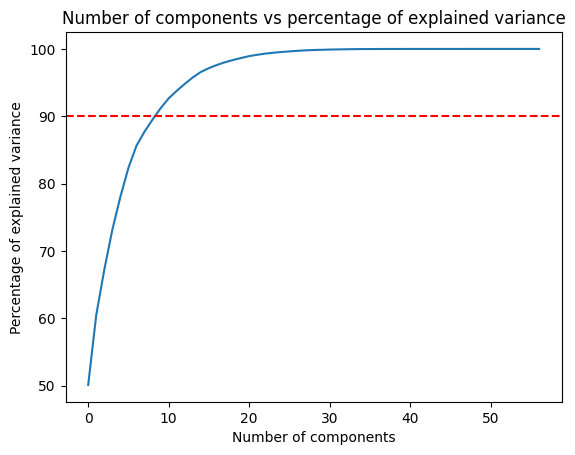

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('Number of components')
plt.ylabel('Percentage of explained variance')
plt.title('Number of components vs percentage of explained variance')
plt.axhline(90,linestyle='--',color="red")
# plt.show()
plt.savefig('direct_pca_explained_variance.eps')

In [ ]:
np.cumsum(pca.explained_variance_ratio_)*100

array([ 50.10094216,  60.48711548,  67.21045675,  73.15475024,
        78.05561917,  82.35441614,  85.63721096,  87.71864113,
        89.51838128,  91.20609331,  92.66639646,  93.78336867,
        94.80670836,  95.77604157,  96.58514848,  97.15052886,
        97.62131962,  98.0239247 ,  98.35794149,  98.65561069,
        98.93191448,  99.13065051,  99.30202256,  99.43499735,
        99.54358635,  99.63447126,  99.71830752,  99.78869333,
        99.83623671,  99.87104336,  99.90383032,  99.92726049,
        99.94851389,  99.96618862,  99.97641901,  99.98363127,
        99.98758512,  99.99109736,  99.99343739,  99.99514748,
        99.99659515,  99.99778391,  99.99878074,  99.99936332,
        99.99969937,  99.99983089,  99.9998939 ,  99.99994149,
        99.99996589,  99.99998338,  99.99999699, 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        ])

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error


In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
pca.fit(X_train_scaled)
X_train=pca.transform(X_train_scaled)
X_test=pca.transform(X_test_scaled)

In [ ]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pLR=LR.predict(X_test)
LRr2=r2_score(y_test,y_pLR)
LRmse=mean_squared_error(y_test,y_pLR)

In [ ]:
LR.intercept_

np.float64(152.26491935483872)

In [ ]:
Las=Lasso()
Las.fit(X_train,y_train)
y_pLas=Las.predict(X_test)
Lasr2=r2_score(y_test,y_pLas)
Lasmse=mean_squared_error(y_test,y_pLas)

In [ ]:
Las.intercept_

np.float64(152.26491935483872)

In [ ]:
Rid=Ridge(solver='cholesky')
Rid.fit(X_train,y_train)
y_pRid=Rid.predict(X_test)
Ridr2=r2_score(y_test,y_pRid)
Ridmse=mean_squared_error(y_test,y_pRid)

In [ ]:
Rid.intercept_

np.float64(152.26491935483872)

In [ ]:
pca_comp=list(pca.get_feature_names_out())
pca_comp

['pca0',
 'pca1',
 'pca2',
 'pca3',
 'pca4',
 'pca5',
 'pca6',
 'pca7',
 'pca8',
 'pca9']

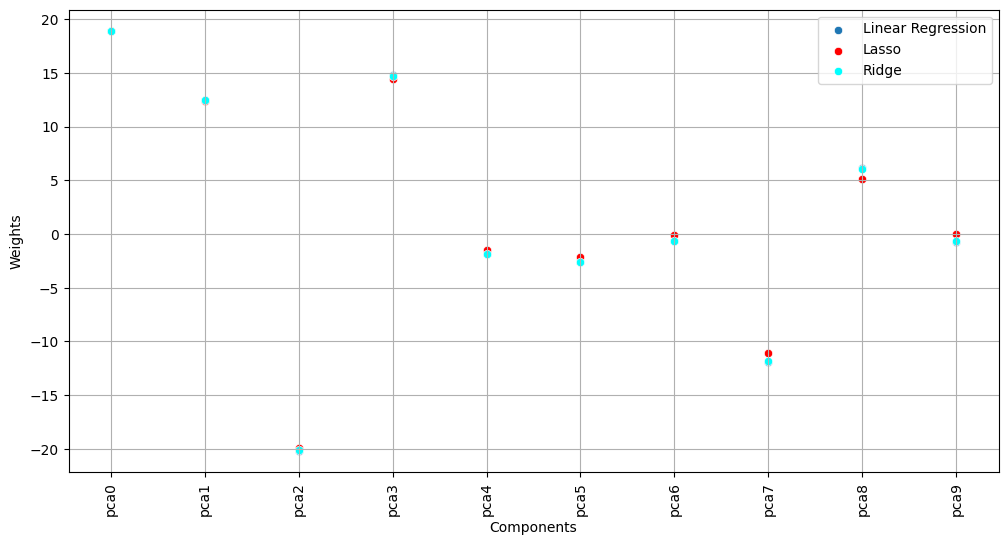

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=pca_comp,y=LR.coef_,label='Linear Regression')
sns.scatterplot(x=pca_comp,y=Las.coef_,color='red',label='Lasso')
sns.scatterplot(x=pca_comp,y=Rid.coef_,color='cyan',label='Ridge')
plt.xlabel('Components')
plt.ylabel('Weights')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.savefig('PCA_weights.eps')
# plt.show()

In [ ]:
LRr2,Lasr2,Ridr2

(0.9358020014945927, 0.9339498546507422, 0.9358477235240409)

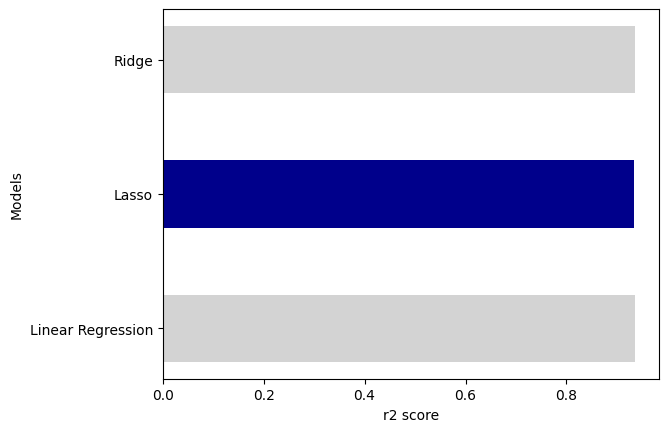

In [ ]:
plt.barh(y=['Linear Regression','Lasso','Ridge'],width=[LRr2,Lasr2,Ridr2],color=['lightgrey','darkblue','lightgrey'],height=0.5)
plt.xlabel('r2 score')
plt.ylabel('Models')
plt.show()

In [ ]:
LRmse,Lasmse,Ridmse

(543.9650137414076, 559.658697451521, 543.5776000376143)

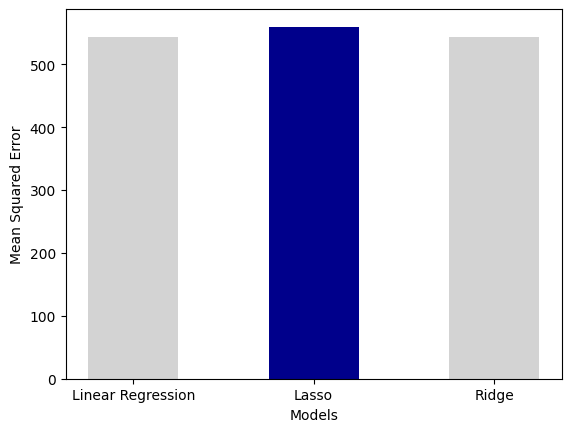

In [ ]:
plt.bar(x=['Linear Regression','Lasso','Ridge'],height=[LRmse,Lasmse,Ridmse],color=['lightgrey','darkblue','lightgrey'],width=0.5)
plt.ylabel('Mean Squared Error')
plt.xlabel('Models')
plt.show()

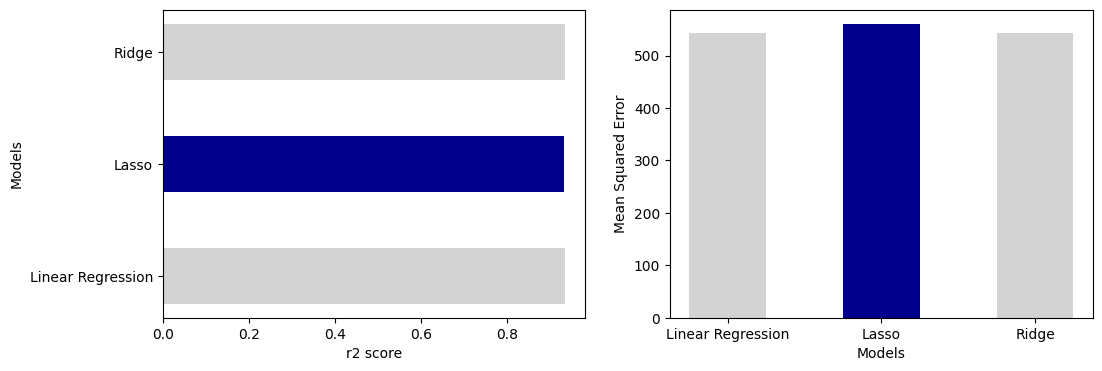

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.barh(y=['Linear Regression','Lasso','Ridge'],width=[LRr2,Lasr2,Ridr2],color=['lightgrey','darkblue','lightgrey'],height=0.5)
plt.xlabel('r2 score')
plt.ylabel('Models')
# plt.show()
plt.subplot(1,2,2)
plt.bar(x=['Linear Regression','Lasso','Ridge'],height=[LRmse,Lasmse,Ridmse],color=['lightgrey','darkblue','lightgrey'],width=0.5)
plt.ylabel('Mean Squared Error')
plt.xlabel('Models')
# plt.show()
plt.savefig('PCA_r2mse.eps')

In [ ]:
df_weights=pd.DataFrame({
    'Features':pca_comp,
    'Linear Regression':LR.coef_,
    'Lasso':Las.coef_,
    'Ridge':Rid.coef_
})
for i in df_weights.columns:
  if i!='Features':
    print(f"{i}: {df_weights.sort_values(i,ascending=False).head(1)['Features'].values}")

Linear Regression: ['pca0']
Lasso: ['pca0']
Ridge: ['pca0']


In [ ]:
LR.intercept_,Las.intercept_,Rid.intercept_

(np.float64(152.26491935483872),
 np.float64(152.26491935483872),
 np.float64(152.26491935483872))

In [ ]:
LR.intercept_

np.float64(152.26491935483872)